<a href="https://colab.research.google.com/github/sankhla2/DL/blob/main/CNN_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importing Libraries

import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torchvision.utils as vutils
import matplotlib.pyplot as plt


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='data/', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='data/', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


In [4]:

# CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2)
        self.fc = nn.Linear(7 * 7 * 32, 10)

    def forward(self, x):
        out = self.conv1(x)
        out = self.relu(out)
        out = self.maxpool(out)
        out = self.conv2(out)
        out = self.relu(out)
        out = self.maxpool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

model = CNN().to(device)

num_epochs = 10
batch_size = 64
learning_rate = 0.001

# Loss function and optimizer ##CrossEntropyLoss best for multiclass
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}")

# Testing
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Accuracy of the model on the test images: {(100 * correct / total):.2f}%")


Epoch [1/10], Step [100/938], Loss: 0.1444
Epoch [1/10], Step [200/938], Loss: 0.4555
Epoch [1/10], Step [300/938], Loss: 0.0672
Epoch [1/10], Step [400/938], Loss: 0.0227
Epoch [1/10], Step [500/938], Loss: 0.0393
Epoch [1/10], Step [600/938], Loss: 0.1250
Epoch [1/10], Step [700/938], Loss: 0.0154
Epoch [1/10], Step [800/938], Loss: 0.1044
Epoch [1/10], Step [900/938], Loss: 0.0726
Epoch [2/10], Step [100/938], Loss: 0.0179
Epoch [2/10], Step [200/938], Loss: 0.0217
Epoch [2/10], Step [300/938], Loss: 0.0556
Epoch [2/10], Step [400/938], Loss: 0.0347
Epoch [2/10], Step [500/938], Loss: 0.0437
Epoch [2/10], Step [600/938], Loss: 0.0255
Epoch [2/10], Step [700/938], Loss: 0.0386
Epoch [2/10], Step [800/938], Loss: 0.0259
Epoch [2/10], Step [900/938], Loss: 0.0318
Epoch [3/10], Step [100/938], Loss: 0.1589
Epoch [3/10], Step [200/938], Loss: 0.0314
Epoch [3/10], Step [300/938], Loss: 0.0109
Epoch [3/10], Step [400/938], Loss: 0.0910
Epoch [3/10], Step [500/938], Loss: 0.0279
Epoch [3/10

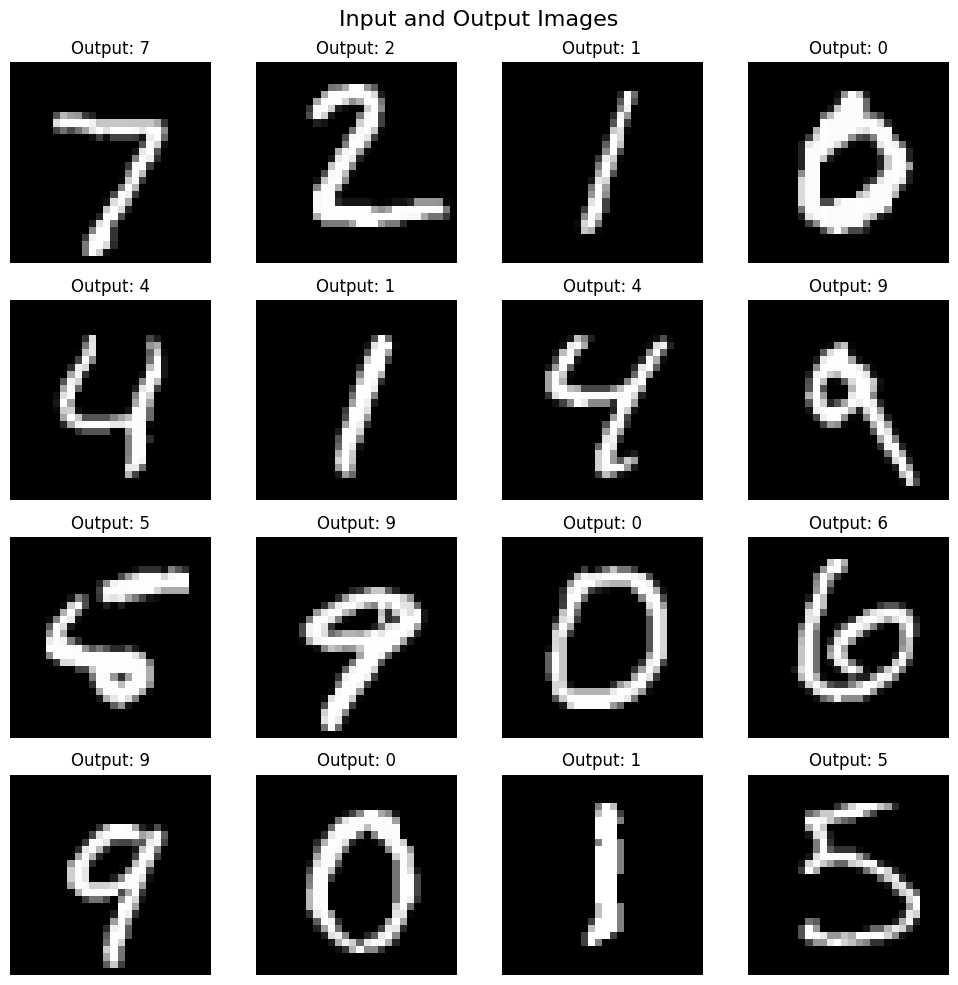

In [5]:
#Showing Images
model.eval()
with torch.no_grad():
    for images, _ in test_loader:
        images = images.to(device)
        outputs = model(images)
        outputs = torch.argmax(outputs, dim=1)

        # Converting images and outputs to numpy arrays
        images = images.cpu().numpy()
        outputs = outputs.cpu().numpy()

        # Reshape images array to (batch_size, 28, 28)
        images = np.transpose(images, (0, 2, 3, 1))
        images = np.squeeze(images)

        # Display the input and output images
        fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
        fig.suptitle('Input and Output Images', fontsize=16)

        for i, ax in enumerate(axes.flatten()):
            ax.imshow(images[i], cmap='gray')
            ax.set_title(f'Output: {outputs[i]}')
            ax.axis('off')

        plt.tight_layout()
        plt.show()
        break  # Only show images from the first batch
